# ACT & SAT Scores Data Analysis

_By Tim Dwyer_

In this notebook I perform some data analysis on the information found the `data` directory of this repository. This data contains aggregate results (by state) for the ACT and SAT in 2017. In addition to information about each state, both datasets contain averages for the District of Columbia. Thee ACT dataset also contains a national average, the SAT dataset does not.

#####  The first thing we'll need to do import the libraries we'll use in this notebook. 

* `pandas` - for reading the data from the `.csv` files in a convenient way.
* `numpy` - for efficient math operations
* `scipy` - for statistical computations
* `matplotlib` - for visualization
* `seaborn` - for better looking, but more restrictive, visualization 


The command `%matplotlib inline` is an `ipython` magic command that allows us to render visualizations within the notebook itself.

In [1]:
import pandas as pd
import numpy as np
import scipy

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
act_df = pd.read_csv("./data/act.csv", index_col=0)
sat_df = pd.read_csv("./data/sat.csv", index_col=0)

In [3]:
act_df.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [4]:
sat_df.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


##### Meaning of the data

The `State` column contains the name of the given state, commonwealth, or district. The ACT data includes an extra row corresponding to National average scores.

The `Participation` is the percentage of high school graduates in that given year that took the SAT or ACT.

The `Total` and `Composite` scores are the sums of all the component sections of the given test.  

The remaining columns correspond to scores on the constituent sections of a given test.

##### Errors and Missing Data


In [5]:
act_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), object(2)
memory usage: 3.2+ KB


In [6]:
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.4+ KB


In [7]:
act_df.describe().T

,count,mean,std,min,25%,50%,75%,max
English,52.0,20.919231,2.332132,16.3,19.000,20.55,23.300,25.5
Math,52.0,21.173077,1.963602,18.0,19.400,20.90,23.100,25.3
Reading,52.0,22.001923,2.048672,18.1,20.475,21.70,24.125,26.0
Science,52.0,21.040385,3.151113,2.3,19.900,21.15,22.525,24.9
Composite,52.0,21.509615,2.002083,17.8,19.800,21.40,23.600,25.5


The minimum values for the SAT Math test and the ACT Science test are very low.

In [8]:
act_df[act_df['Science'] < 10]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [9]:
sat_df[sat_df['Math'] < 400]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


Not only are the ACT Science score and SAT Math scores low for Mayland, the Total SAT doesn't add up for Maryland.

Something is very wrong here.

In [10]:
total_computed_sat = sat_df['Math'] + sat_df['Evidence-Based Reading and Writing']

In [11]:
sat_df[abs(total_computed_sat - sat_df['Total']) > 0]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
12,Idaho,93%,513,493,1005
15,Iowa,2%,641,635,1275
18,Louisiana,4%,611,586,1198
20,Maryland,69%,536,52,1060
21,Massachusetts,76%,555,551,1107
22,Michigan,100%,509,495,1005
24,Mississippi,2%,634,607,1242
27,Nebraska,3%,629,625,1253


In [12]:
sat_df[abs(total_computed_sat - sat_df['Total']) >= 2]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


So some of the Total scores for SAT are off by $1$, but this seems like it could just be a result of rounding. I am willing to, for now, assume that the differences other than Maryland are due to rounding as they're all fairly small.

Maryland seems to have some issues with entering their data--there is no way that these scores are that low! Also the `Total` score is not at all consistent with the `Math` score. According to the [SAT data source](https://blog.prepscholar.com/average-sat-scores-by-state-most-recent)  the correct `Math` SAT score for Maryland is $524$. Similarly the correct `Science` ACT score is $23.2$ according to the [ACT data source](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows).

In [13]:
sat_df[sat_df['State'] == 'Maryland']

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [14]:
sat_df.at[20, 'Math'] = 524

In [15]:
sat_df[sat_df['State']=='Maryland']

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,524,1060


In [16]:
act_df[act_df['State']=='Maryland']

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [17]:
act_df.at[21, 'Science'] = 23.2

In [18]:
act_df[act_df['State']=='Maryland']

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,23.2,23.6



##### Check the data types of each column.

In [19]:
act_df.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [20]:
sat_df.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In both dataframes, State and Participation are both strings, the rest are numeric (either floating point numbers or integers). The `Participation` column would probably be more useful as a float.

In [21]:
act_df['Participation'] = act_df['Participation'].apply(lambda x: float(x.replace('%','')))

In [22]:
sat_df['Participation'] = sat_df['Participation'].apply(lambda x: float(x.replace('%','')))

In [23]:
act_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(6), object(1)
memory usage: 5.8+ KB


In [24]:
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.9+ KB


##### Merge the dataframes
So we can look up scores within one dataframe, we'll go ahead and merge them together. 

In [25]:
from collections import defaultdict

In [26]:
def create_state_dict(df):
    df_dict = defaultdict(dict)

    def score_recorder(row,subject):
        df_dict[subject][row['State']] = row[subject]

    for subject in act_df.columns:
        act_df.apply(lambda x: score_recorder(x,subject), axis = 1);
    return df_dict

In [27]:
act_dict = create_state_dict(act_df)
sat_dict = create_state_dict(sat_df)

##### Create some dictionaries to simplify the merging

In [28]:
act_columns = {key:act_df[key] for key in act_df.columns}
sat_columns = {key:sat_df[key] for key in sat_df.columns}

In [29]:
combined = pd.merge(sat_df, act_df,on='State',suffixes=['_SAT','_ACT'])

In [30]:
combined.head()

,State,Participation_SAT,Evidence-Based Reading and Writing,Math_SAT,Total,Participation_ACT,English,Math_ACT,Reading,Science,Composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


##### Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

The only column names that were not suffixed when merging are   
>`Evidence-Based Reading and Writing` and `Total` for SAT  
>`English`, `Reading`, `Science`, and `Composite` for ACT  

In [88]:
rename = {
    'Evidence-Based Reading and Writing': 'Evidence-Based Reading and Writing_SAT',
    'Total': 'Total_SAT',
    
    'English': 'English_ACT',
    'Reading': 'Reading_ACT',
    'Science': 'Science_ACT',
    'Composite': 'Composite_ACT'
}
combined.rename(mapper=rename, axis=1, inplace=True)

In [32]:
combined.head()

,State,Participation_SAT,Evidence-Based Reading and Writing_SAT,Math_SAT,Total_SAT,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


##### Minimum and maximum of each numeric column in the data frame.

In [33]:
agg = combined.describe()
for column in agg.columns:
    mx, mn = agg[column].loc[['max','min']]
    print(f'The maximum statewide average for {column}: {mx}')
    print(f'The minimum statewide average for {column}: {mn}\n')

The maximum statewide average for Participation_SAT: 100.0
The minimum statewide average for Participation_SAT: 2.0

The maximum statewide average for Evidence-Based Reading and Writing_SAT: 644.0
The minimum statewide average for Evidence-Based Reading and Writing_SAT: 482.0

The maximum statewide average for Math_SAT: 651.0
The minimum statewide average for Math_SAT: 468.0

The maximum statewide average for Total_SAT: 1295.0
The minimum statewide average for Total_SAT: 950.0

The maximum statewide average for Participation_ACT: 100.0
The minimum statewide average for Participation_ACT: 8.0

The maximum statewide average for English_ACT: 25.5
The minimum statewide average for English_ACT: 16.3

The maximum statewide average for Math_ACT: 25.3
The minimum statewide average for Math_ACT: 18.0

The maximum statewide average for Reading_ACT: 26.0
The minimum statewide average for Reading_ACT: 18.1

The maximum statewide average for Science_ACT: 24.9
The minimum statewide average for Scien

##### New row containing standard deviation information 

In [36]:
sd = [np.std(combined[key]) for key in combined.select_dtypes(exclude='object').columns]

In [38]:
sd

[34.92907076664508,
 45.21697020437866,
 46.65713364485503,
 91.58351056778743,
 31.824175751231806,
 2.3304876369363363,
 1.9624620273436781,
 2.0469029314842646,
 1.7222161451443676,
 2.000786081581989]

Because I don't really trust these things to be ordered consistently I'm just going to use a dictionary.

In [39]:
sd2 = {key:np.std(combined[key]) for key in combined.select_dtypes(exclude='object').columns}

In [40]:
sd2

{'Participation_SAT': 34.92907076664508,
 'Evidence-Based Reading and Writing_SAT': 45.21697020437866,
 'Math_SAT': 46.65713364485503,
 'Total_SAT': 91.58351056778743,
 'Participation_ACT': 31.824175751231806,
 'English_ACT': 2.3304876369363363,
 'Math_ACT': 1.9624620273436781,
 'Reading_ACT': 2.0469029314842646,
 'Science_ACT': 1.7222161451443676,
 'Composite_ACT': 2.000786081581989}

In [41]:
sd2['State'] = 'Standard Deviation'

In [42]:
sd_row = pd.Series(sd2)

In [43]:
combined = combined.append(sd_row, sort=False, ignore_index=True)

Now there is another row in the dataframe `combined` which containes the standard deviation of each column. 

In [44]:
combined.iloc[45:]

,State,Participation_SAT,Evidence-Based Reading and Writing_SAT,Math_SAT,Total_SAT,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT
45,Vermont,60.000000,562.00000,551.000000,1114.000000,29.000000,23.300000,23.100000,24.400000,23.200000,23.600000
46,Virginia,65.000000,561.00000,541.000000,1102.000000,29.000000,23.500000,23.300000,24.600000,23.500000,23.800000
47,Washington,64.000000,541.00000,534.000000,1075.000000,29.000000,20.900000,21.900000,22.100000,22.000000,21.900000
48,West Virginia,14.000000,558.00000,528.000000,1086.000000,69.000000,20.000000,19.400000,21.200000,20.500000,20.400000
49,Wisconsin,3.000000,642.00000,649.000000,1291.000000,100.000000,19.700000,20.400000,20.600000,20.900000,20.500000
50,Wyoming,3.000000,626.00000,604.000000,1230.000000,100.000000,19.400000,19.800000,20.800000,20.600000,20.200000
51,Standard Deviation,34.929071,45.21697,46.657134,91.583511,31.824176,2.330488,1.962462,2.046903,1.722216,2.000786


##### Sort the dataframe by the participation rates
We'll look at the information sorted by the two participation rates. The following dataframe shows those states with the top SAT participation rates, with ties broken by the ACT participation rate.

In [61]:
combined.sort_values(['Participation_SAT', 'Participation_ACT'], ascending=False).head(5)

,State,Participation_SAT,Evidence-Based Reading and Writing_SAT,Math_SAT,Total_SAT,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT
8,District of Columbia,100.0,482.0,468.0,950.0,32.0,24.4,23.5,24.9,23.5,24.2
6,Connecticut,100.0,530.0,512.0,1041.0,31.0,25.5,24.6,25.6,24.6,25.2
22,Michigan,100.0,509.0,495.0,1005.0,29.0,24.1,23.7,24.5,23.8,24.1
7,Delaware,100.0,503.0,492.0,996.0,18.0,24.1,23.4,24.8,23.6,24.1
29,New Hampshire,96.0,532.0,520.0,1052.0,18.0,25.4,25.1,26.0,24.9,25.5


##### What states have a high Math SAT score?

In [63]:
combined[combined['Math_SAT'] > 600]

,State,Participation_SAT,Evidence-Based Reading and Writing_SAT,Math_SAT,Total_SAT,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT
15,Iowa,2.0,641.0,635.0,1275.0,67.0,21.2,21.3,22.6,22.1,21.9
16,Kansas,4.0,632.0,628.0,1260.0,73.0,21.1,21.3,22.3,21.7,21.7
17,Kentucky,4.0,631.0,616.0,1247.0,100.0,19.6,19.4,20.5,20.1,20.0
23,Minnesota,3.0,644.0,651.0,1295.0,100.0,20.4,21.5,21.8,21.6,21.5
24,Mississippi,2.0,634.0,607.0,1242.0,100.0,18.2,18.1,18.8,18.8,18.6
25,Missouri,3.0,640.0,631.0,1271.0,100.0,19.8,19.9,20.8,20.5,20.4
27,Nebraska,3.0,629.0,625.0,1253.0,84.0,20.9,20.9,21.9,21.5,21.4
34,North Dakota,2.0,635.0,621.0,1256.0,98.0,19.0,20.4,20.5,20.6,20.3
41,South Dakota,3.0,612.0,603.0,1216.0,80.0,20.7,21.5,22.3,22.0,21.8
42,Tennessee,5.0,623.0,604.0,1228.0,100.0,19.5,19.2,20.1,19.9,19.8


## Visualization 

##### Histograms of participation rates

Text(0.5,0,'Participation Rate in ACT')

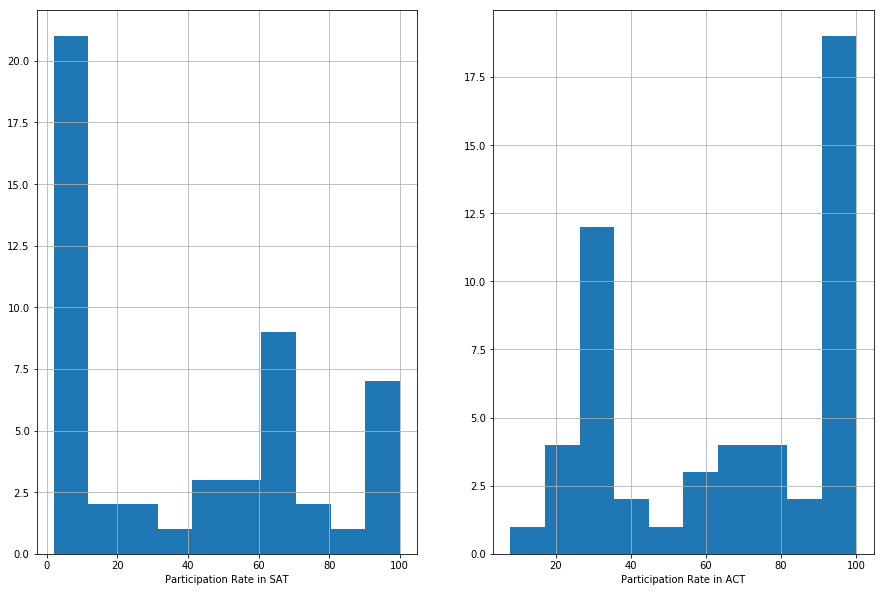

In [89]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

sat_df['Participation'].hist(ax=ax[0])
ax[0].set_xlabel('Participation Rate in SAT')

act_df['Participation'].hist(ax=ax[1])
ax[1].set_xlabel('Participation Rate in ACT')


##### Math Score distributions

/usr/local/miniconda3/envs/mac/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/miniconda3/envs/mac/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Distribution of Math Scores for ACT')

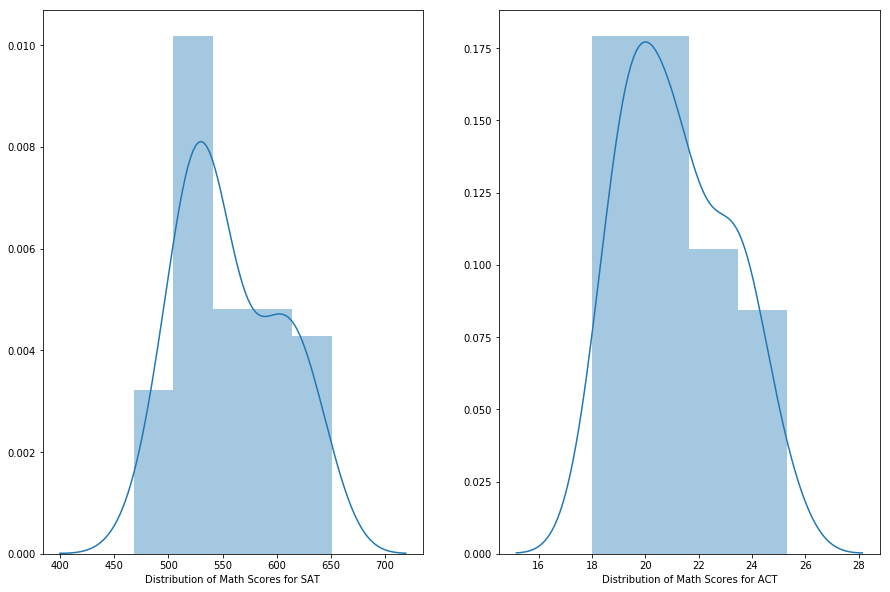

In [90]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

sns.distplot(sat_df['Math'], ax=ax[0])
ax[0].set_xlabel('Distribution of Math Scores for SAT')

sns.distplot(act_df['Math'],ax=ax[1])
ax[1].set_xlabel('Distribution of Math Scores for ACT')


##### English & Reading and Writing Score distributions

/usr/local/miniconda3/envs/mac/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/miniconda3/envs/mac/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Distribution of Evidence-Based Reading and Writing Scores for ACT')

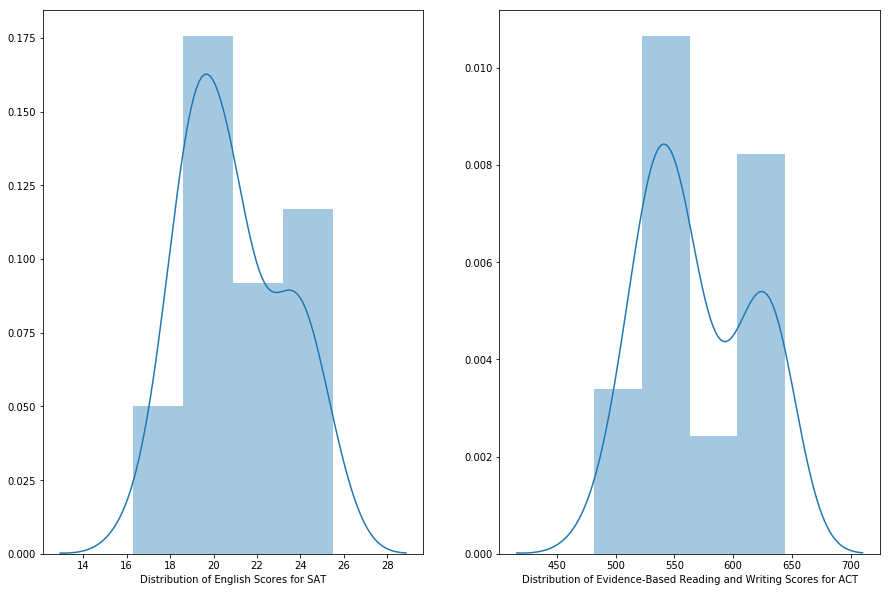

In [91]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

sns.distplot(act_df['English'], ax=ax[0])
ax[0].set_xlabel('Distribution of English Scores for SAT')

sns.distplot(sat_df['Evidence-Based Reading and Writing'],ax=ax[1])
ax[1].set_xlabel('Distribution of Evidence-Based Reading and Writing Scores for ACT')


##### Scatter Plots

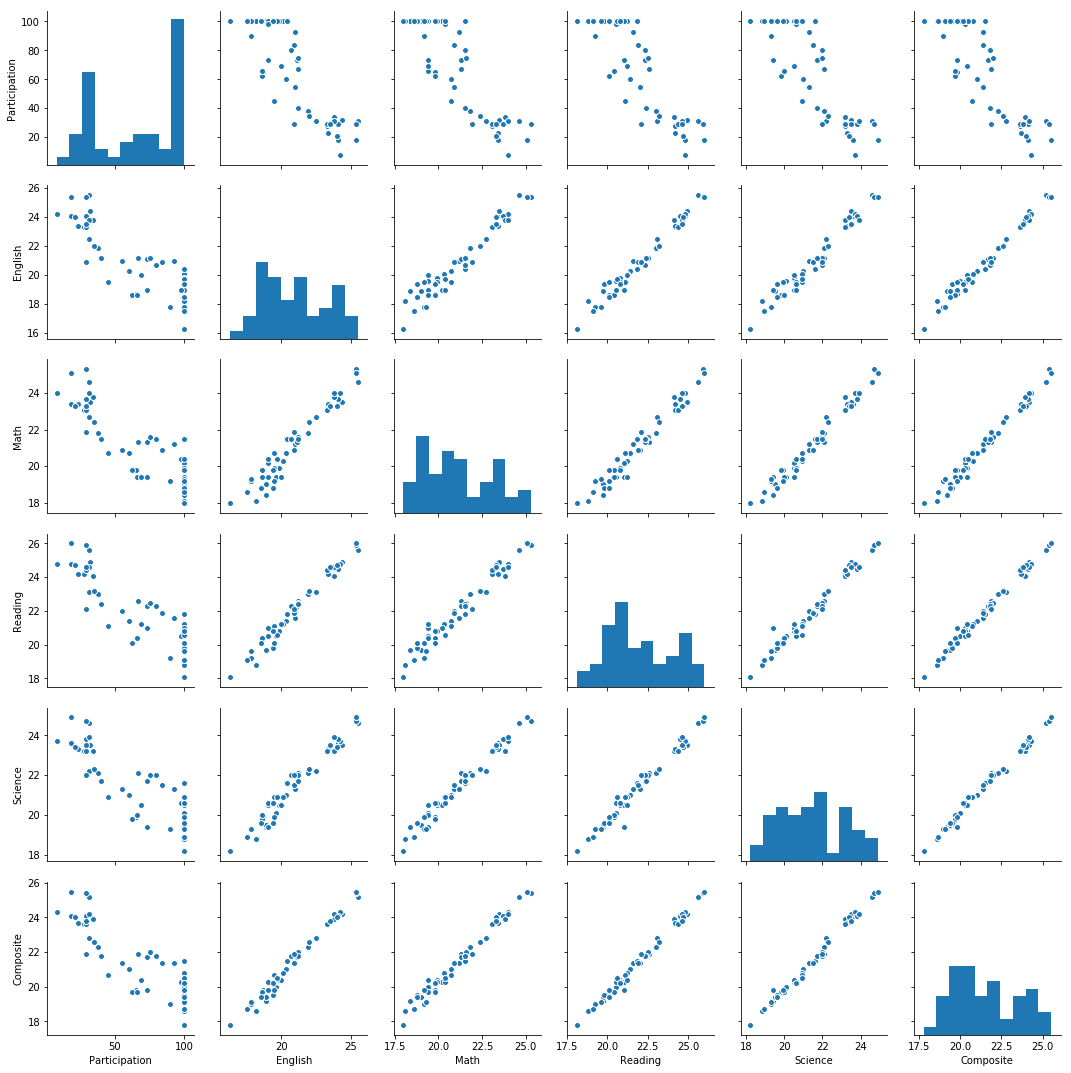

In [92]:
sns.pairplot(act_df)

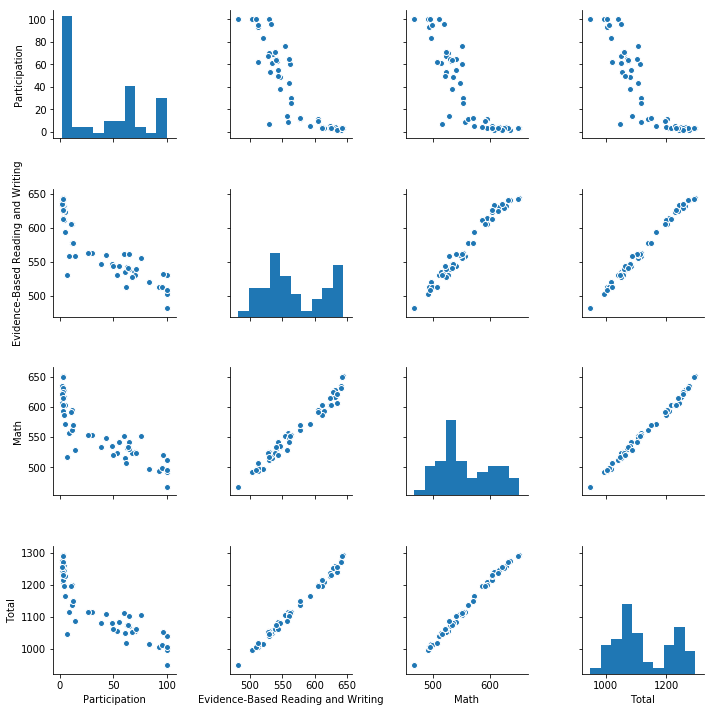

In [93]:
sns.pairplot(sat_df)

The above plots all only contain data pertaining to one exam, either ACT or SAT.  

Now we'll look at scatter plots comparing information between the two exams.

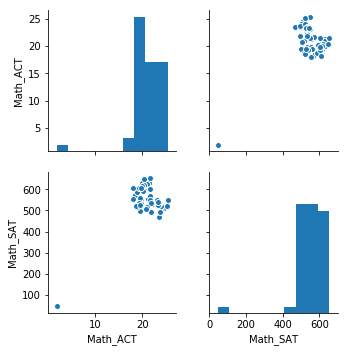

In [94]:
sns.pairplot(combined[['Math_ACT','Math_SAT']])

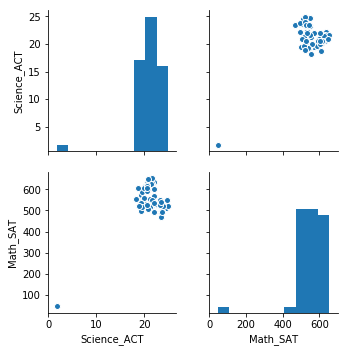

In [95]:
sns.pairplot(combined[['Science_ACT','Math_SAT']])

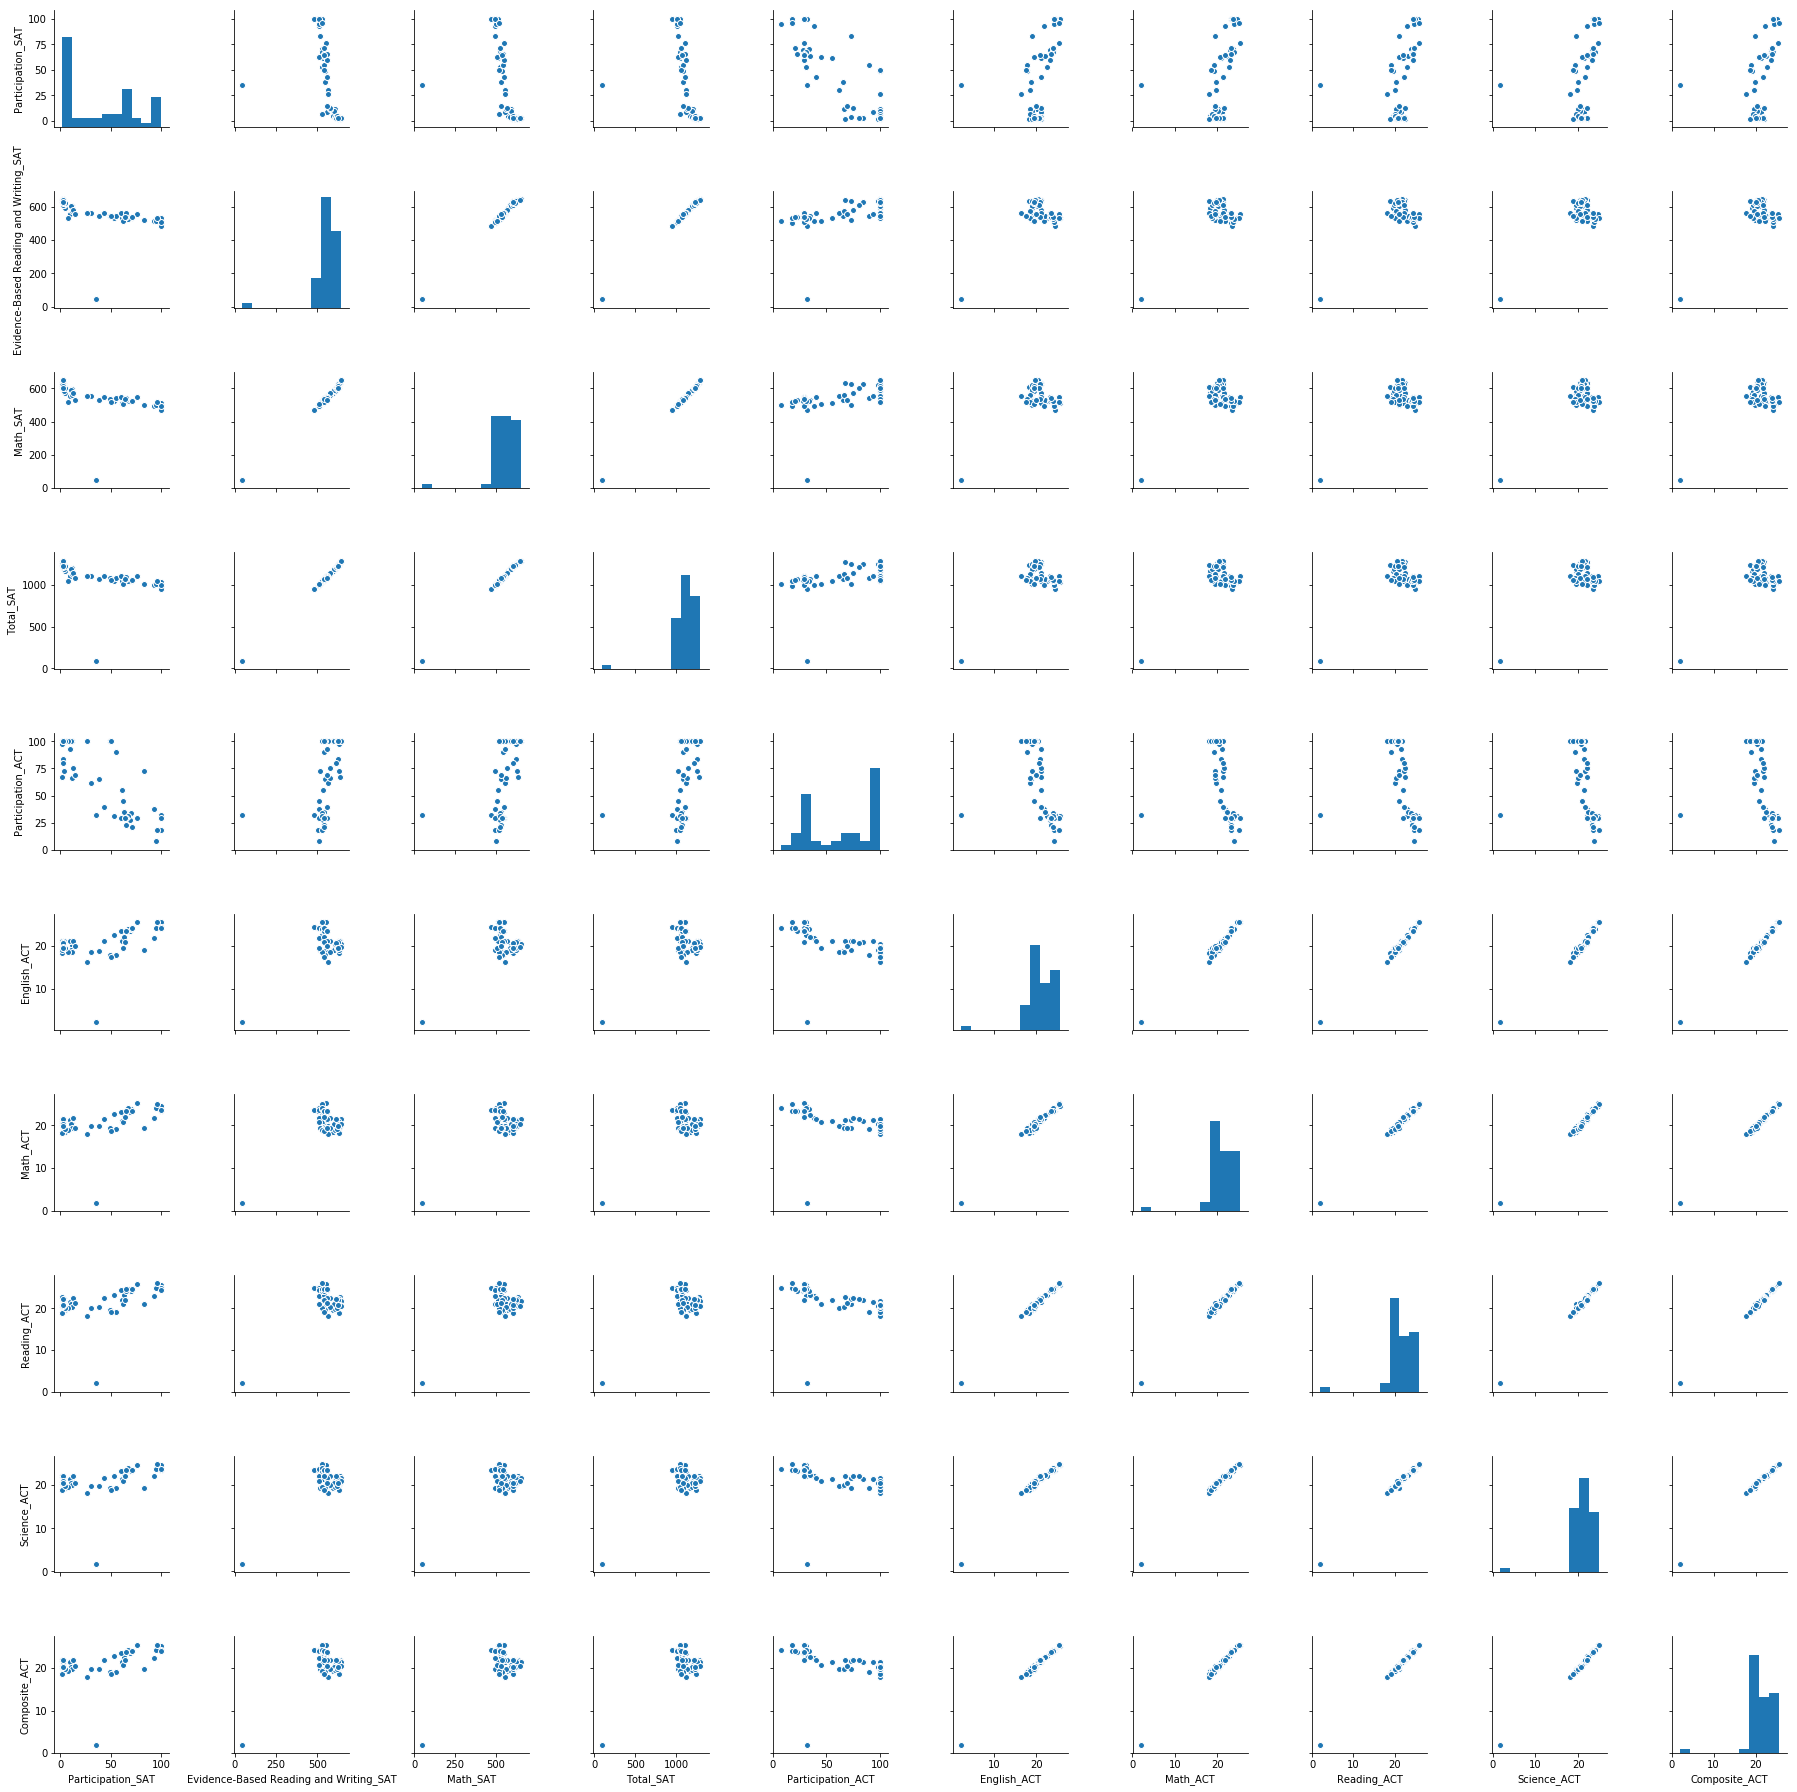

In [96]:
sns.pairplot(combined)

##### Density Estimators

That's a lot of plots! Let's pick just a few, and look at the density function estimator Seaborn uses. This is an estimate of the bivariate distribution of the two data sets.

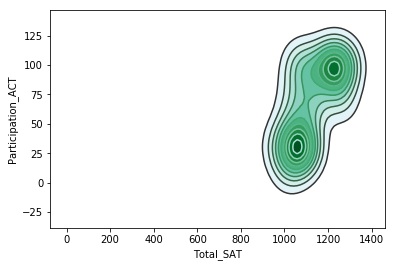

In [70]:
sns.kdeplot(combined['Total_SAT'],combined['Participation_ACT'],shade=True,shade_lowest=False)
sns.kdeplot(combined['Total_SAT'],combined['Participation_ACT'])


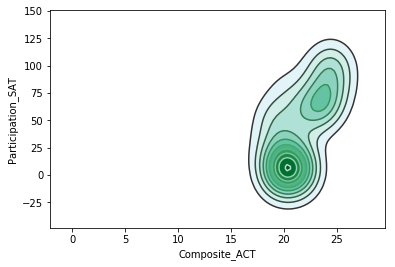

In [71]:
sns.kdeplot(combined['Composite_ACT'],combined['Participation_SAT'],shade=True,shade_lowest=False)
sns.kdeplot(combined['Composite_ACT'],combined['Participation_SAT'])


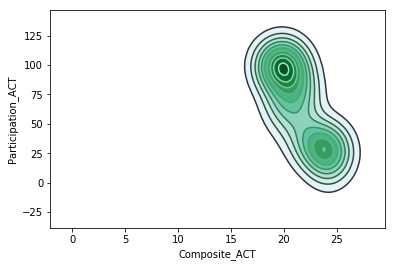

In [72]:
sns.kdeplot(combined['Composite_ACT'],combined['Participation_ACT'],shade=True,shade_lowest=False)
sns.kdeplot(combined['Composite_ACT'],combined['Participation_ACT'])


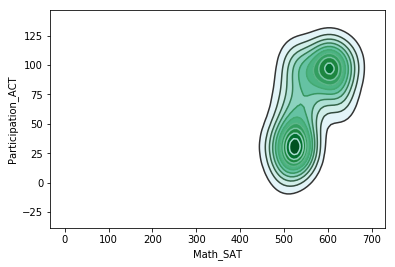

In [73]:
sns.kdeplot(combined['Math_SAT'],combined['Participation_ACT'],shade=True,shade_lowest=False,)
sns.kdeplot(combined['Math_SAT'],combined['Participation_ACT'])


##### Box Plots

Text(0,0.5,'ACT Subject')

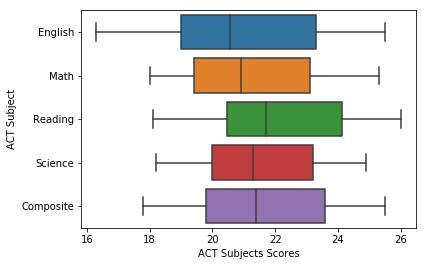

In [80]:
sns.boxplot(data=act_df.drop(columns=['Participation']), orient='h')
plt.xlabel('ACT Subjects Scores')
plt.ylabel('ACT Subject')

Text(0,0.5,'SAT Subject')

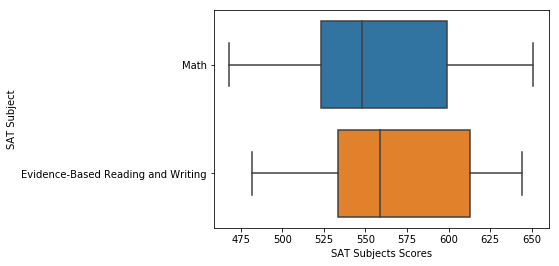

In [82]:
sns.boxplot(data=sat_df[['Math','Evidence-Based Reading and Writing']], orient='h')
plt.xlabel('SAT Subjects Scores')
plt.ylabel('SAT Subject')

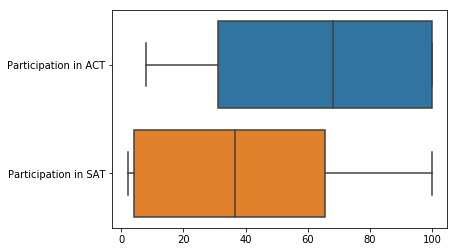

In [83]:
data = {
    'Participation in ACT':combined['Participation_ACT'],
    'Participation in SAT':combined['Participation_SAT'],
}

sns.boxplot(data=pd.DataFrame(data), orient='h')
plt.savefig('participation_rates.png', format='png', dpi=500)

## Inference and Descriptions

In [84]:
combined_desc = combined.describe().drop(['Participation_ACT','Participation_SAT'], axis=1)

In [85]:
for column in combined_desc:
    subject, test = column.split('_')
    info = combined_desc[column]
    message = f'''
    Some summary statistics for the {subject} section of the {test} is as follows
     Mean:                {info['mean']}
     Standard Deviation:  {info['std']}
     Maximum:             {info['max']}
     Minimum:             {info['min']}
    '''
    print(message)


    Some summary statistics for the Evidence-Based Reading and Writing section of the SAT is as follows
     Mean:                559.0426340423919
     Standard Deviation:  85.57383088941117
     Maximum:             644.0
     Minimum:             45.21697020437866
    

    Some summary statistics for the Math section of the SAT is as follows
     Mean:                547.0703294931702
     Standard Deviation:  84.75393758081961
     Maximum:             651.0
     Minimum:             46.65713364485503
    

    Some summary statistics for the Total section of the SAT is as follows
     Mean:                1106.2035290493807
     Standard Deviation:  170.20193657916073
     Maximum:             1295.0
     Minimum:             91.58351056778743
    

    Some summary statistics for the English section of the ACT is as follows
     Mean:                20.57366322378724
     Standard Deviation:  3.4763317759585894
     Maximum:             25.5
     Minimum:             2.33048763

##### 25. Heat map of correlations

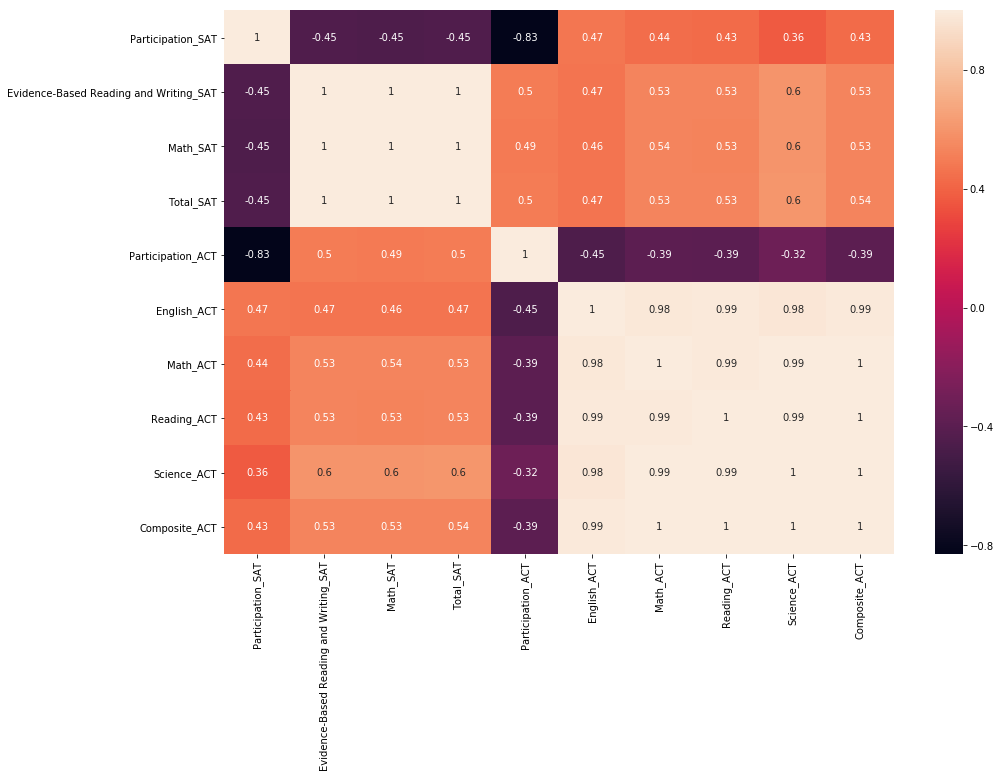

In [87]:
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(combined.corr(),annot=True)

For a given test, all measure of performatnce highly correclate, ie the correlation between Math and English on the SAT is $0.99$. In comparing the two tests, we see that all measures of performance are negatively correlated between the two tests, ranging from $-.49$ to $-.37$. 

Participation rate for ACT correlates negatively with ACT scores but positively with SAT scores. Similarly participation rate for SAT correlates negatively with SAT scores but positively with ACT scores.

##### Summary of correlations between scores.

1. Positive correlation between Participation in SAT and Scores on ACT  
1. Positive correlation between Participation in ACT and Scores on SAT
1. Negative correlation between Participation in SAT and Scores on SAT  
1. Negative correlation between Participation in ACT and Scores on ACT

Also there seems to be some kind of grouping going on when we plot the Kernel density estimators for some of the bivariate data, so it would be very interesting if there is a meaningful explanation for this dichotomy.